## Helper functions

In [1]:
import networkx as nx
import scipy
import matplotlib.pyplot as plt
import clique_discovery 

In [62]:
# Function to calculate the cliques and GRAPH in one single line.
def nice_graph(T):
    
    def append_path(G, path, weight):
        previous = path[0]
        for node in path[1:]:
            edges.append( (previous, node, {"weight":weight}) )
            previous = node
        G.add_edges_from(edges)

 

    weighted_paths = clique_discovery.infer_paths_from_traces( T )
    print(weighted_paths)
    found_paths = {}
    edges = []
    G = nx.DiGraph()
    
    # Check serial: solo disjuntos del mismo largo
    for w in sorted(weighted_paths, reverse=True):
        for path_w in weighted_paths[w]:
            if w not in found_paths.keys():
                found_paths[w] = []
            if all( [ not set(path_w).intersection(set(z)) for z in found_paths[w] ] ):
                append_path( G, path_w, w )                
                
    pos = nx.spring_layout(G)
    nx.draw_networkx (G, pos, node_color="#cccccc", with_labels=True, connectionstyle='arc3, rad=0.5' )
    plt.show()

In [34]:
# Stolen from https://stackoverflow.com/questions/12836385/how-can-i-interleave-or-create-unique-permutations-of-two-strings-without-recur/12837695
# More doc at http://www.cs.utsa.edu/~wagner/knuth/fasc2b.pdf
class Interleave():

    def __init__(self, A, B):
        self.A = A
        self.B = B
        self.results = list(self.__interleave())

    # from https://stackoverflow.com/a/104436/1561176
    def __all_perms(self, elements):
        if len(elements) <=1:
            yield elements
        else:
            for perm in self.__all_perms(elements[1:]):
                for i in range(len(elements)):
                    #nb elements[0:1] works in both string and list contexts
                    yield perm[:i] + elements[0:1] + perm[i:]

    def __sequences(self):
        return list( sorted( set(
            ["".join(x) for x in self.__all_perms(['a'] * len(self.A) + ['b'] * len(self.B))] ) ) )

    def __interleave(self):
        for sequence in self.__sequences():
            result = ""
            a = 0
            b = 0
            for item in sequence:
                if item == 'a':
                    result+=self.A[a]
                    a+=1
                else:
                    result+=self.B[b]
                    b+=1
            yield result

    def __str__(self):
        return str(self.results)

    def __repr__(self):
        return repr(self.results)


## Serial Execution

{1: [['A', 'B', 'C', 'D', 'E']]}


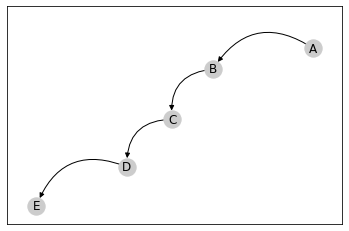

In [45]:
single_path = [ list("ABCDE") ]
nice_graph( single_path )

{1: [['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], ['O', 'P', 'Q', 'R']]}


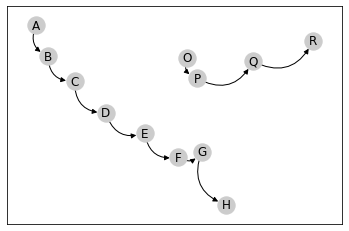

In [47]:
two_single_paths = [
    list("ABCDEFGH"),
    list("OPQR")
]
nice_graph( two_single_paths )

{2: [['A', 'B', 'C']], 1: [['C', 'B', 'A']]}


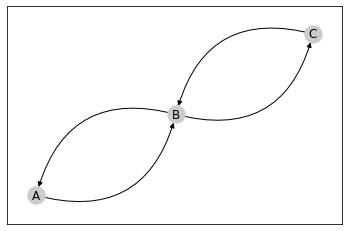

In [46]:
loop = [list("ABCABC")]
nice_graph( loop )

{3: [['A', 'B', 'C', 'D']], 2: [['D', 'C', 'B', 'A']], 1: [['B', '1', '2', '3', '4'], ['C', '1', '2', '3', '4'], ['D', '1', '2', '3', '4'], ['A', '1', '2', '3', '4']]}


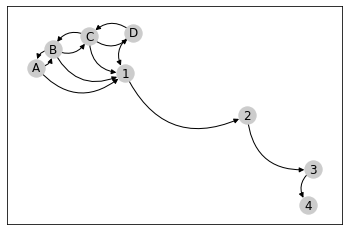

In [50]:
loop_with_tail = [
    list("ABCDABCDABCD1234"),
]
nice_graph( loop_with_tail ) 

{3: [['2', 'A', 'B', 'C', 'D'], ['1', 'A', 'B', 'C', 'D'], ['4', 'A', 'B', 'C', 'D'], ['3', 'A', 'B', 'C', 'D']], 2: [['D', 'C', 'B', 'A']], 1: [['1', '2', '3', '4']]}


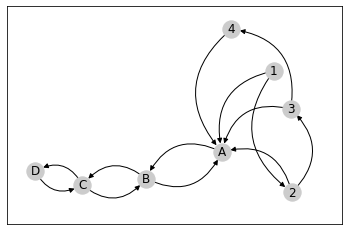

In [55]:
head_with_loop = [
    list("1234ABCDABCDABCD"),
]
nice_graph( head_with_loop ) 

{6: [['B', 'c', 'd', 'e'], ['A', 'c', 'd', 'e']], 3: [['A', 'B', 'F', 'G', 'H'], ['e', 'd', 'c', 'F', 'G', 'H']]}


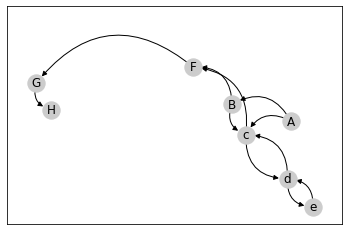

In [58]:
loop_inside = [
#     list("ABFG"),
    list("ABcdecdeFGH"),
    list("ABcdecdecdeFGH"),
    list("ABcdeFGH"),
]
nice_graph( loop_inside )

{2: [['A', 'B']], 1: [['B', 'C'], ['B', 'D'], ['A', 'C'], ['A', 'D']]}


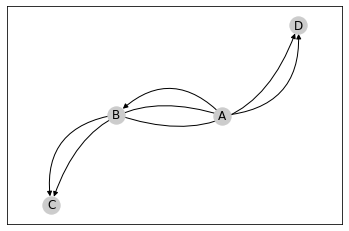

In [56]:
tree_trace = [
    list("ABC"),
    list("ABD"),
]
nice_graph(  tree_trace )

{6: [['A', 'B']], 3: [['B', '2', '6'], ['B', '1', '5'], ['A', '2', '6'], ['A', '1', '5']], 2: [['B', 'm', 'n'], ['B', 'p', 'q'], ['B', 's', 't'], ['A', 'm', 'n'], ['A', 'p', 'q'], ['A', 's', 't']], 1: [['n', '2'], ['m', '2'], ['p', '2'], ['q', '2'], ['t', '2'], ['s', '2'], ['n', '5'], ['m', '5'], ['p', '5'], ['q', '5'], ['t', '5'], ['s', '5'], ['n', '6'], ['m', '6'], ['p', '6'], ['q', '6'], ['t', '6'], ['s', '6'], ['n', '1'], ['m', '1'], ['p', '1'], ['q', '1'], ['t', '1'], ['s', '1']]}


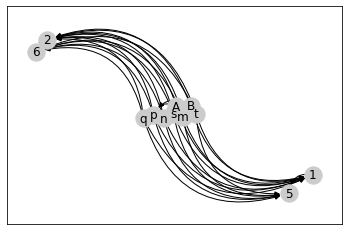

In [57]:
tree_trace = [
    list("ABmn15"),
    list("ABmn26"),
    list("ABpq15"),
    list("ABpq26"),
    list("ABst15"),
    list("ABst26"),
]
nice_graph(  tree_trace ) 

{6: [['A', 'B', 'C']], 5: [['B', 'D', 'E', 'F', 'G'], ['C', 'D', 'E', 'F', 'G'], ['A', 'D', 'E', 'F', 'G']]}


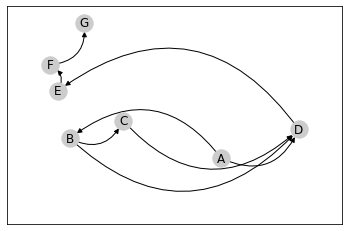

In [31]:
# With error in the middle
truncated_trace = [
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABC"),
]
nice_graph(truncated_trace)

## Parallel Executions

The notion of parallelism in execution of the traces implies that there is no successor dependency between the threads. This can be achieved analitically in these two ways:

1. Analitically, by having a perfect interleave of each element in both set of traces to ensure that no artificial successors are considered
1. Heuristically, by creating sample traces conforming some construction parameters that amount of loops, trees, etc.

### Interleaving traces

In [42]:
Interleave("ABC", "123")

['ABC123', 'AB1C23', 'AB12C3', 'AB123C', 'A1BC23', 'A1B2C3', 'A1B23C', 'A12BC3', 'A12B3C', 'A123BC', '1ABC23', '1AB2C3', '1AB23C', '1A2BC3', '1A2B3C', '1A23BC', '12ABC3', '12AB3C', '12A3BC', '123ABC']

{20: [['A', 'B', 'C'], ['1', '2', '3']], 19: [['1', 'C'], ['A', '3']], 16: [['1', 'B'], ['B', '3'], ['2', 'C'], ['A', '2']], 4: [['B', '1'], ['3', 'B'], ['C', '2'], ['2', 'A']], 1: [['C', '1'], ['3', 'A']]}


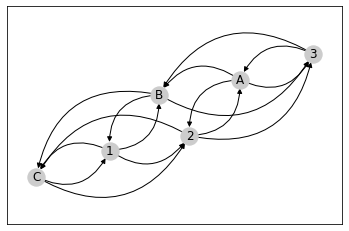

In [59]:
# Two Serials, perfectly interleaved
interleaved_trace = [ list(x) for x in eval(str(Interleave("ABC", "123"))) ]
nice_graph(interleaved_trace)

{168: [['1', '2', '3']], 147: [['A', '3']], 129: [['A', '2']], 111: [['B', '3']], 102: [['A', '1']], 84: [['B', '2'], ['A', 'B', 'C'], ['3', '2', '1']], 83: [['1', 'C']], 80: [['2', 'C']], 77: [['1', 'B']], 74: [['3', 'C']], 66: [['C', '3']], 65: [['2', 'B']], 57: [['B', '1']], 56: [['1', 'A']], 50: [['3', 'B']], 39: [['C', '2']], 35: [['2', 'A']], 21: [['C', '1']], 20: [['3', 'A']]}


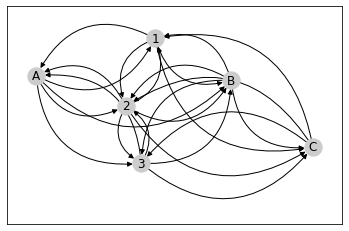

In [60]:
# Serial and loop, in parallel
interleaved_trace = [ list(x) for x in eval(str(Interleave("ABC", "123123"))) ]
nice_graph(interleaved_trace)